<a href="https://colab.research.google.com/github/AnastasiyaPunko/Systems-biology/blob/main/HW1_PunkoAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Воспроизведение 2х компартментной модели  Levitt&Levitt, 1998

Для воспроизведения модели необходимо численно решить дифференциальные уравнения, которые описывают изменения концентрации этанола в печени и организме: <br>
<br>
(2) VB(dCB/dt) = FHV(CL - CB) + QIV <br>
(3) VL(dCL/dt) = FHV(CB - CL) + QGI - VmaxCL/(Km + CL)<br>
<br>


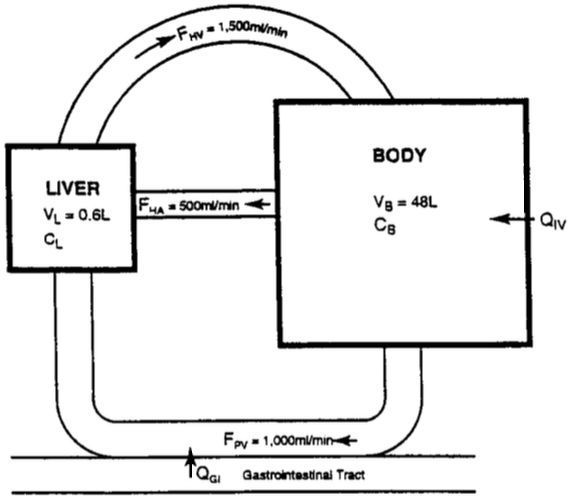

**Параметры модели**

In [ ]:
Fhv = 1.5 #liters/min
Vb = 48 #liters
Vl = 0.61 #liters
Vmax = 0.00275 #2.75 mmol/min/80 kg
Km = 0.0001  #0.1 mM
Qiv = 720 * 0.08 / 120 * 0.789 / 46.069 # 2-hr intravenous infusion of 720 ml of 8% V/V ethanol; Плотность этилового спирта 0,789 г/см3; Молекулярная масса 46,069 г/моль
Cb = 0 #Concentrations in the body water
Cl = 0 #Concentrations in the liver compartments

**Численно дифференциальные уравнения можно решить методом Эйлера.**

Для решения уравнения методом Эйлера необходимо разбить отрезок времени на небольшие интервалы и приближенно вычислить значения функции на каждом интервале. <br>

Например, для первого уравнения используется следующая формула:
<br>
*CB(i+1) = CB(i) + h * (FHV(CL(i) - CB(i)) + QIV) / VB*
<br>

*где CB(i) - значение функции на предыдущем интервале времени,* <br>
*CB(i+1) - значение функции на текущем интервале времени,* <br>
*h - шаг по времени.*<br>

Начальное значение функции CB(0) и CL(0) задано.



In [ ]:
import numpy as np
t = np.linspace(0, 8 * 60, 10001) # time from 0 to 8 hours (*60 to min)
Cb, Cl = np.zeros(t.shape), np.zeros(t.shape)

for i in range(1, 10000):
    Cb[i+1] = Cb[i] + (t[i+1] - t[i]) * (Fhv * (Cl[i] - Cb[i]) + (Qiv if t[i] <= 2 * 60 else 0)) / Vb
    Cl[i+1] = Cl[i] + (t[i+1] - t[i]) * (Fhv * (Cb[i] - Cl[i]) - Vmax * Cl[i] / (Km + Cl[i])) / Vl

**Нарисуем, как наша модель предсказывает данные изменения концентрации этанола в организме.**

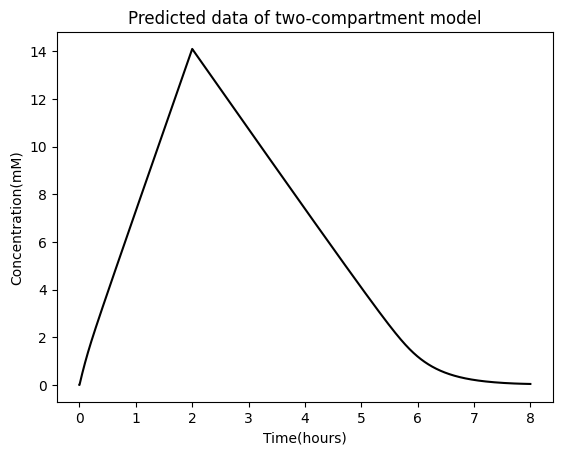

In [ ]:
import matplotlib.pyplot as plt
plt.plot(t / 60, Cb * 1000, color = 'black')
plt.title('Predicted data of two-compartment model')
plt.xlabel("Time(hours)")
plt.ylabel("Concentration(mM)")
plt.show()

Загрузим среднии концентрации этанола в капиллярах в указанное время отбора проб во время и после 2-часовой внутривенной инфузии 720 мл этанола V/V в физиологическом растворе 6 взрослым мужчинам.

In [ ]:
import pandas as pd
df = pd.read_table('alco.tsv')
print(df)

     time  conc_mgml
0   0.083      0.063
1   0.250      0.160
2   0.500      0.260
3   0.750      0.370
4   1.000      0.460
5   1.500      0.590
6   2.000      0.740
7   2.083      0.700
8   2.167      0.660
9   2.250      0.630
10  2.500      0.580
11  2.750      0.550
12  3.000      0.500
13  3.500      0.430
14  4.000      0.350
15  4.500      0.280
16  5.000      0.180
17  5.250      0.150
18  5.500      0.110
19  5.750      0.076
20  6.000      0.052
21  6.250      0.036
22  6.500      0.025
23  6.750      0.013
24  7.000      0.010


**Нарисуем, предсказанные моделью данные и наблюдаемые значения.**

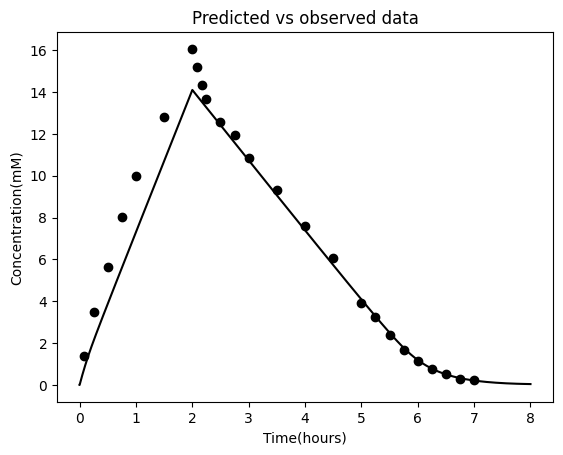

In [ ]:
plt.plot(t / 60, Cb * 1000, color = 'black')
plt.xlabel("Time(hours)")
plt.ylabel("Concentration(mM)")
plt.title('Predicted vs observed data')

x = df['time']
y = np.array(df['conc_mgml']) * 1000 / 46.069
plt.scatter(x, y, color = 'black')

plt.show()

Сравнение наблюдаемого снижения концентрации этанола в крови и темпов снижения, предсказанных двухкомпартментной моделью. Точки представляют собой средние значения содержания этанола в крови, наблюдаемые Wilkinson et al. Данные, предсказанные двухкомпартментной моделью изображены линией и были рассчитаны, как описано в Levitt&Levitt, 1998.

**Воспроизведем Fig. 1 (Levitt&Levitt, 1998)**

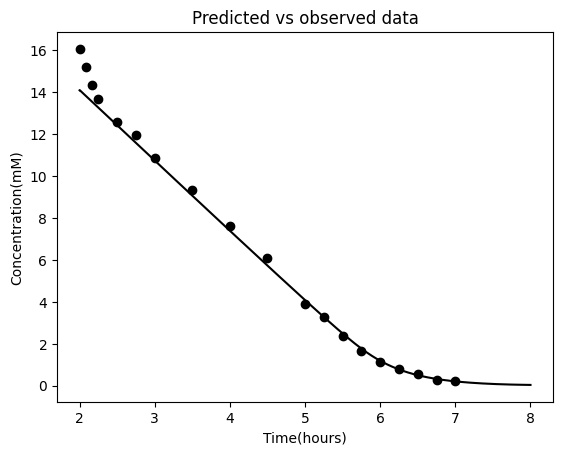

In [ ]:
plt.plot(t[2500:10001] / 60, Cb[2500:10001] * 1000, color = 'black')
plt.xlabel("Time(hours)")
plt.ylabel("Concentration(mM)")
plt.title('Predicted vs observed data')

df = df.drop([0, 1 ,2, 3, 4, 5])
x = df['time']
y = np.array(df['conc_mgml']) * 1000 / 46.069
plt.scatter(x, y, color = 'black')

plt.show()

--------------------------

# **Задача : узнать какой максимальный объём водки можно выпить, чтобы через два часа концентрация в крови не превышала 6.5 ммоль/л.**

Чтобы через два часа концентрация в крови не превышала 6.5 ммоль/л, максимально можно выпить **434.39 мл** 8% этанола.

In [ ]:
Qiv = 434.39 * 0.08 / 120 * 0.789 / 46.069
Cb = 0 #Concentrations in the body water
Cl = 0 #Concentrations in the liver compartments

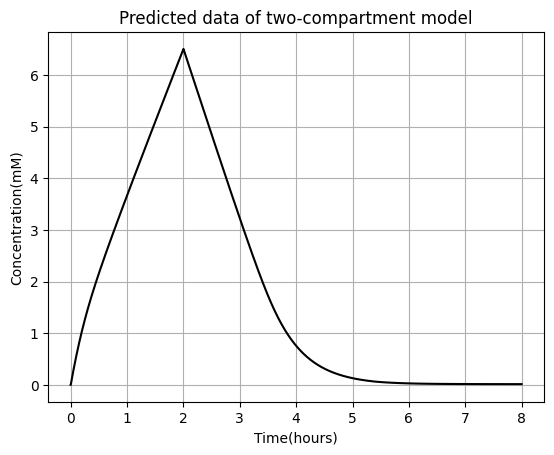

In [ ]:
t = np.linspace(0, 8 * 60, 10001)
Cb, Cl = np.zeros(t.shape), np.zeros(t.shape)

for i in range(1, 10000):
    Cb[i+1] = Cb[i] + (t[i+1] - t[i]) * (Fhv * (Cl[i] - Cb[i]) + (Qiv if t[i] <= 2 * 60 else 0)) / Vb
    Cl[i+1] = Cl[i] + (t[i+1] - t[i]) * (Fhv * (Cb[i] - Cl[i]) - Vmax * Cl[i] / (Km + Cl[i])) / Vl

plt.plot(t / 60, Cb * 1000, color = 'black')
plt.title('Predicted data of two-compartment model')
plt.xlabel("Time(hours)")
plt.ylabel("Concentration(mM)")
plt.grid()
plt.show()

In [ ]:
t[2500]/60 # time = 2 hours

2.0

In [ ]:
Cb[2500]*1000 # concentration = 6.499 mM

6.499776987272364

-----------------------

**Водка = 40% этанол** <br>

Здесь я попробовала применить модель для случая, если у нас будет не 8% этанол, а 40%.

Чтобы через два часа концентрация в крови не превышала 6.5 ммоль/л, максимально можно выпить **86.879 мл** 40% этанола.

In [ ]:
Qiv = 86.879 * 0.4 / 120 * 0.789 / 46.069
Cb = 0 #Concentrations in the body water
Cl = 0 #Concentrations in the liver compartments

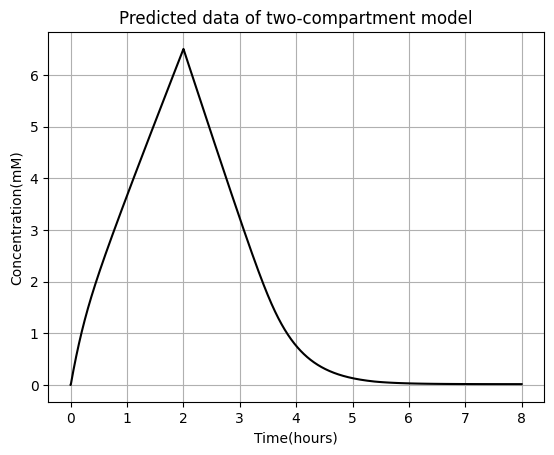

In [ ]:
t = np.linspace(0, 8 * 60, 10001)
Cb, Cl = np.zeros(t.shape), np.zeros(t.shape)

for i in range(1, 10000):
    Cb[i+1] = Cb[i] + (t[i+1] - t[i]) * (Fhv * (Cl[i] - Cb[i]) + (Qiv if t[i] <= 2 * 60 else 0)) / Vb
    Cl[i+1] = Cl[i] + (t[i+1] - t[i]) * (Fhv * (Cb[i] - Cl[i]) - Vmax * Cl[i] / (Km + Cl[i])) / Vl

plt.plot(t / 60, Cb * 1000, color = 'black')
plt.title('Predicted data of two-compartment model')
plt.xlabel("Time(hours)")
plt.ylabel("Concentration(mM)")
plt.grid()
plt.show()

In [ ]:
t[2500]/60 # time = 2 hours

2.0

In [ ]:
Cb[2500]*1000 # concentration = 6.4999 mM

6.499903350414899

К сожалению, я перепробоваала несколько способов модифицировать код, но более надежным из них мне показался способ подобрать значение объема спирта(предыдущие значения получены таким способом), хотя я понимаю, что это не совсем правильно.

In [ ]:
#Здесь я выразила Q из уравнения, значение концентрации 6.5 ммоль/л, время 2 часа
Q = (Vb * 0.0065) / (t[2500]) - Fhv * (Cl[2500] - 0.0065)

Значения получились немного выше предыдущих

In [ ]:
print(f'Чтобы через два часа концентрация в крови не превышала 6.5 ммоль/л,\n максимально можно выпить {round(Q / 0.00001142, 2)} мл 8% этанола.')

Чтобы через два часа концентрация в крови не превышала 6.5 ммоль/л,
 максимально можно выпить 465.93 мл 8% этанола.


In [ ]:
print(f'Чтобы через два часа концентрация в крови не превышала 6.5 ммоль/л,\n максимально можно выпить {round(Q / 0.00005709, 3)} мл 40% этанола.')

Чтобы через два часа концентрация в крови не превышала 6.5 ммоль/л,
 максимально можно выпить 93.202 мл 40% этанола.
